C:\Users\mateo\anaconda3\envs\introds\lib\site-packages\scipy\stats\stats.py:2836: VisibleDeprecationWarning: use of scale='raw' is deprecated, use scale=1.0 instead
  warnings.warn(


46


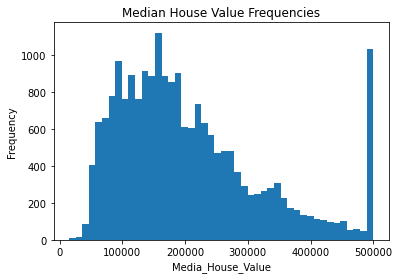

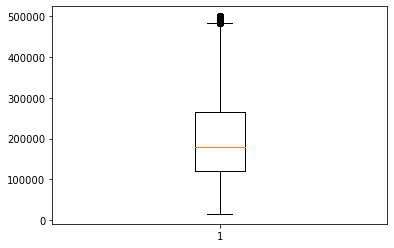

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

def freedman_diaconis(data, returnas="width"):
    """
    Use Freedman Diaconis rule to compute optimal histogram bin width. 
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively. 


    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin. 
        If "bins", return the number of bins suggested by rule.
    """
    data = np.asarray(data, dtype=np.float_)
    IQR  = stats.iqr(data, rng=(25, 75), scale="raw", nan_policy="omit")
    N    = data.size
    bw   = (2 * IQR) / np.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return(result)


df = pd.read_csv("California_Houses.csv")
bin_size = freedman_diaconis(df["Median_House_Value"], returnas="bins")
print(bin_size)
plt.hist(df["Median_House_Value"], bins=bin_size)
plt.title("Median House Value Frequencies")
plt.xlabel("Media_House_Value")
plt.ylabel("Frequency")

plt.show()
plt.boxplot(df["Median_House_Value"])
plt.show()

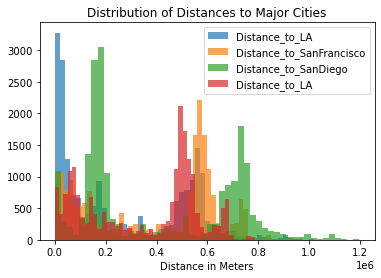

In [7]:
plt.hist(df["Distance_to_LA"],alpha=0.7,bins=50)
plt.hist(df["Distance_to_SanFrancisco"],alpha=0.7,bins=50)
plt.hist(df["Distance_to_SanDiego"],alpha=0.7,bins=50)
plt.hist(df["Distance_to_SanJose"],alpha=0.7,bins=50)
plt.legend(["Distance_to_LA", "Distance_to_SanFrancisco", "Distance_to_SanDiego", "Distance_to_LA"])
plt.title("Distribution of Distances to Major Cities")
plt.xlabel("Distance in Meters")
plt.show()

In [26]:
df[["Median_House_Value", "Median_Income", "Distance_to_coast"]].describe()

,Median_House_Value,Median_Income,Distance_to_coast
count,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.870671,40509.264883
std,115395.615874,1.899822,49140.039160
min,14999.000000,0.499900,120.676447
25%,119600.000000,2.563400,9079.756762
50%,179700.000000,3.534800,20522.019100
75%,264725.000000,4.743250,49830.414478
max,500001.000000,15.000100,333804.686400


In [10]:
print(len(df[df["Median_House_Value"] < 500000]))

965


In [30]:
correlations = df.corr()
correlations.style.background_gradient(cmap='Blues')
print(correlations['Median_House_Value'].sort_values(ascending=False))

Median_House_Value          1.000000
Median_Income               0.688075
Tot_Rooms                   0.134153
Median_Age                  0.105623
Households                  0.065843
Tot_Bedrooms                0.050594
Population                 -0.024650
Distance_to_SanFrancisco   -0.030559
Distance_to_SanJose        -0.041590
Longitude                  -0.045967
Distance_to_SanDiego       -0.092510
Distance_to_LA             -0.130678
Latitude                   -0.144160
Distance_to_coast          -0.469350
Name: Median_House_Value, dtype: float64


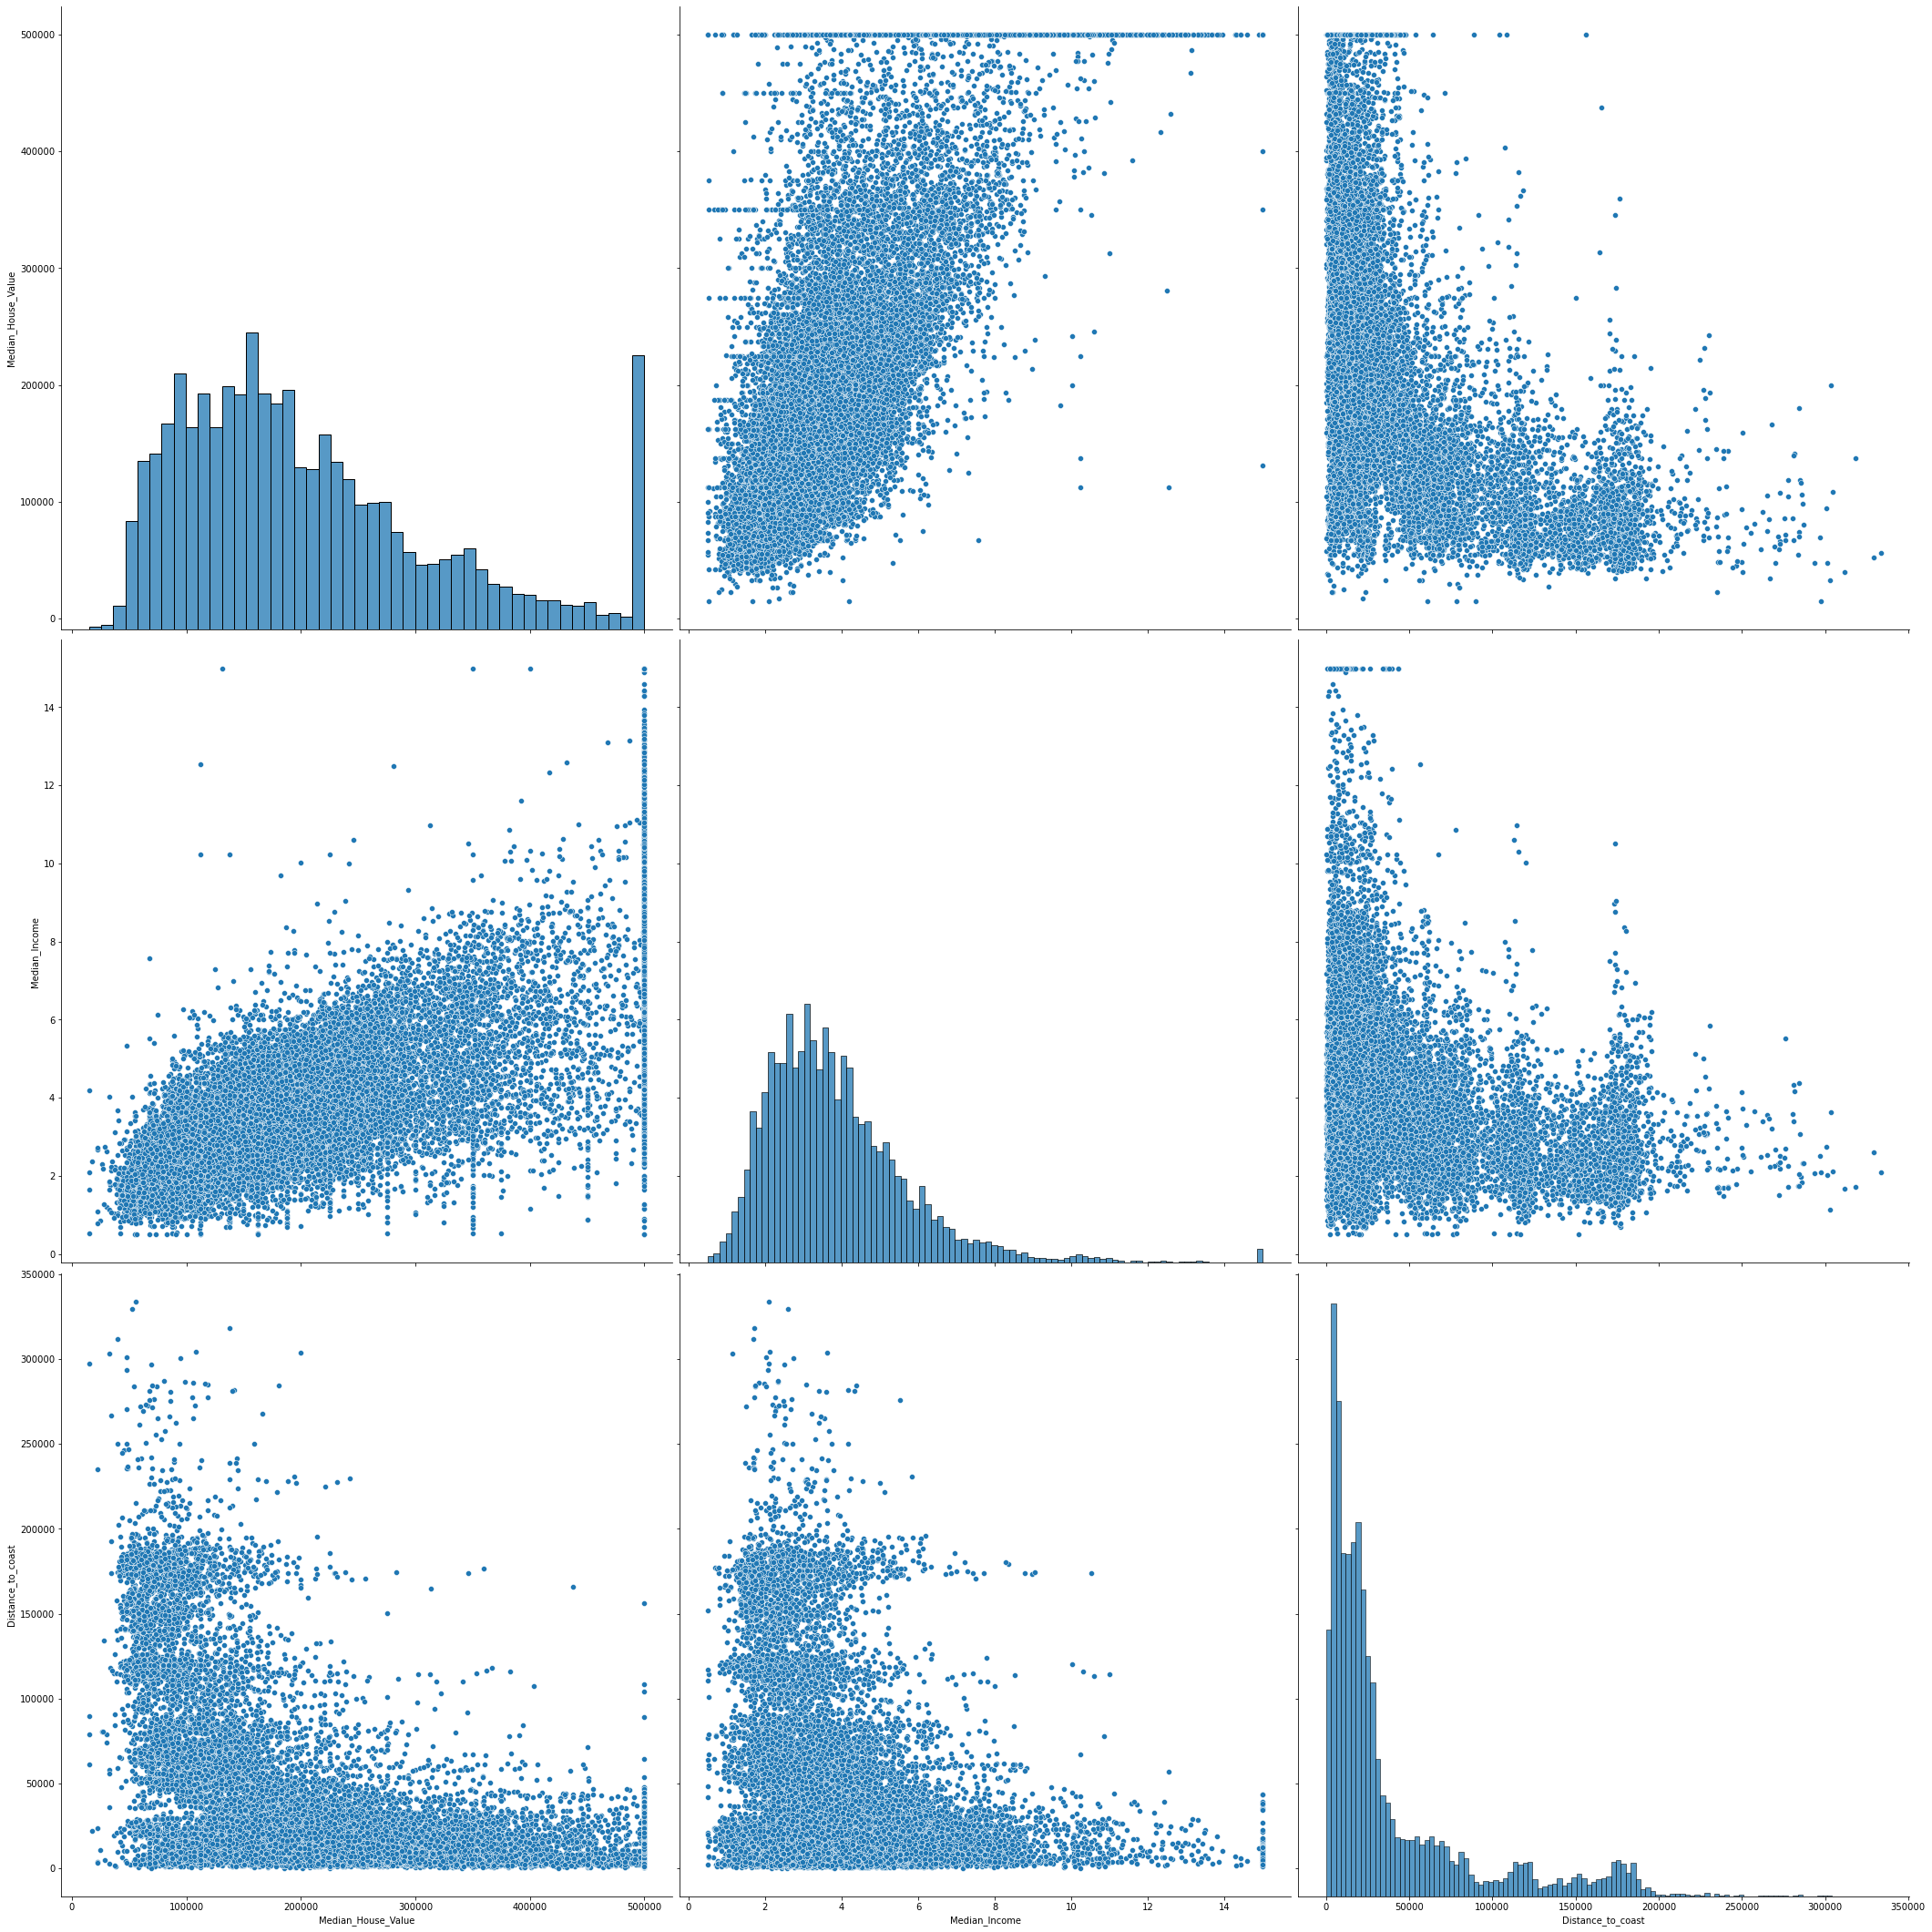

In [12]:
g = sns.pairplot(df[["Median_House_Value", "Median_Income", "Distance_to_coast"]], kind="scatter", diag_kind="hist", height=10)